In [1]:
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

In [3]:
data = pd.read_pickle("../data/Preprocessed_Data.pkl")

In [4]:
data.head()

,Tweet,Depressive
0,severely depressed summer seriously thought haveis not depression anymore surpassed first holder new worse mental illness,1
1,like wake panic knowing thing get done today already dreading moment foot touch ground mentalhealthissues anxienty depression,1
2,bpd anxiety depression,1
3,depression make forget trying not gain weight,1
4,really survive depression,1


In [5]:
data.tail()

,Tweet,Depressive
141205,look like good time,0
141206,great,0
141207,ti sad sunset,0
141208,oof true not big fan hat either jdksksks,0
141209,brain help scream,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data["Tweet"], data["Depressive"], test_size=.2, stratify=data["Depressive"], random_state=42)

In [7]:
vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(X_train)

CountVectorizer(stop_words='english')

In [9]:
print("No. of feature_words: ", len(vectorizer.get_feature_names()))

No. of feature_words:  71977


In [10]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [11]:
X_train.shape

(112968, 71977)

In [12]:
X_test.shape

(28242, 71977)

In [13]:
def model_evaluate(model, X_test, y_test):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.set(font_scale=2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':18}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':18}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':20}, pad = 20)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15230
           1       1.00      0.99      0.99     13012

    accuracy                           0.99     28242
   macro avg       0.99      0.99      0.99     28242
weighted avg       0.99      0.99      0.99     28242

Time Taken: 4 seconds


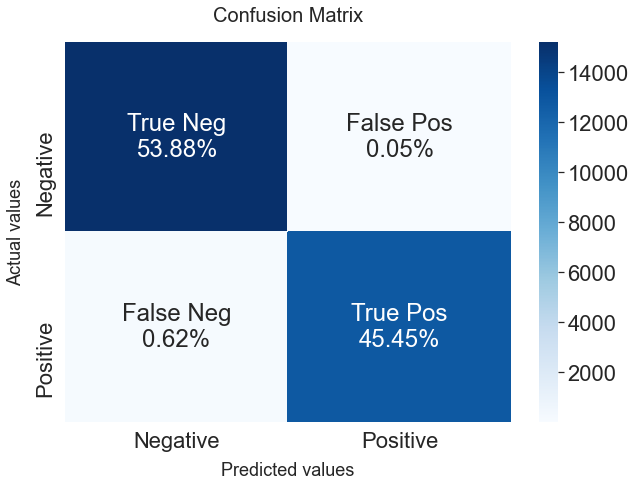

In [14]:
import time
t = time.time()
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
model_evaluate(SVC_model, X_test, y_test)
print(f'Time Taken: {round(time.time()-t)} seconds')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15230
           1       1.00      0.99      0.99     13012

    accuracy                           0.99     28242
   macro avg       0.99      0.99      0.99     28242
weighted avg       0.99      0.99      0.99     28242

Time Taken: 4 seconds


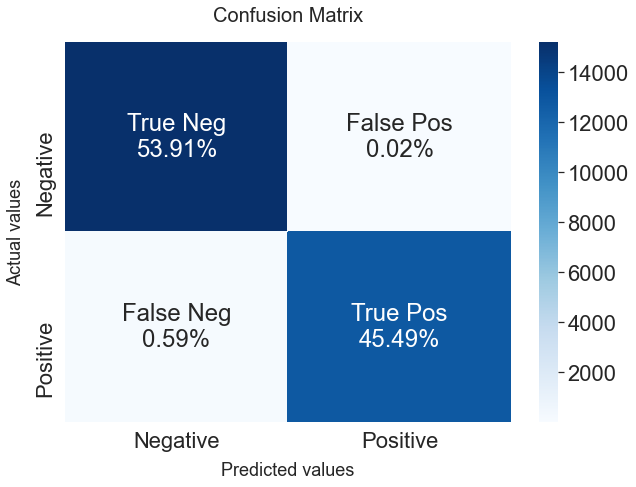

In [15]:
import time
t = time.time()
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
model_evaluate(LR_model,X_test, y_test)
print(f'Time Taken: {round(time.time()-t)} seconds')

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15230
           1       0.88      0.98      0.93     13012

    accuracy                           0.93     28242
   macro avg       0.93      0.93      0.93     28242
weighted avg       0.93      0.93      0.93     28242

Time Taken: 0 seconds


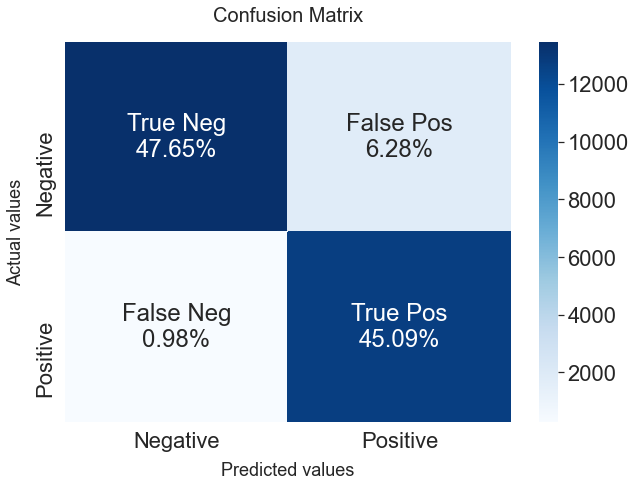

In [16]:
import time
t = time.time()
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
model_evaluate(NB_model,X_test, y_test)
print(f'Time Taken: {round(time.time()-t)} seconds')

In [ ]:
import time
t = time.time()
XGB_model = XGBClassifier(max_depth=5, n_estimators=500)
XGB_model.fit(X_train, y_train)
model_evaluate(XGB_model,X_test, y_test)
print(f'Time Taken: {round(time.time()-t)} seconds')

[00:42:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
val_data = pd.read_csv("../data/final_dataset/Validation_Data.csv")
val_data.head()

In [ ]:
val_data["Target"].value_counts()

In [ ]:
val_x = val_data.iloc[:, lambda val_x: [0]]
val_y = val_data.iloc[:, lambda val_y: [1]]

In [ ]:
val_x = val_x.squeeze()

In [ ]:
val_x.shape

In [ ]:
val_y = val_y.squeeze()

In [ ]:
val_y.shape

In [ ]:
val_x = vectorizer.transform(val_x)

In [ ]:
val_x.shape

In [ ]:
val_y.shape

In [ ]:
model_evaluate(LR_model, val_x, val_y)

In [ ]:
model_evaluate(SVC_model, val_x, val_y)

In [ ]:
model_evaluate(NB_model, val_x, val_y)

In [ ]:
model_evaluate(XGB_model, val_x, val_y)